# Polinomial Models

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Sample dataset
data = {
    'Study_Hours': [1,2,3,4,5,6,7,8,9,10],
    'Exam_Score': [50,65,75,80,85,88,89,88,85,80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

In [7]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df[['Study_Hours']]
Y = df[['Exam_Score']]

In [8]:
# Fit linear regression for comparison
lin_reg=LinearRegression()
lin_reg.fit(X, Y)
lin_pred=lin_reg.predict(X)

# Fit polynomial regression
poly_degree = 2
poly_features = PolynomialFeatures(degree=poly_degree)
X_poly = poly_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, Y)
poly_pred = poly_reg.predict(X_poly)


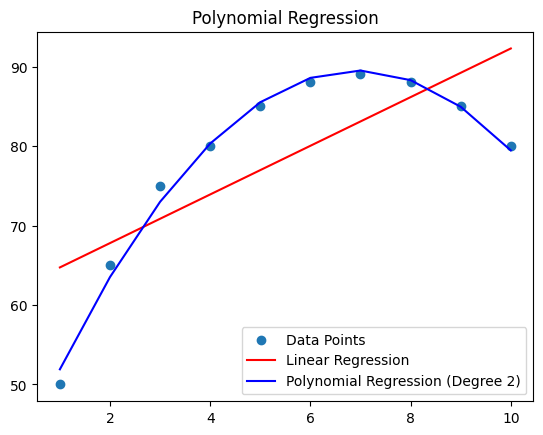

Linear Regression - MSE: 61.37, R^2: 0.56
Polynomial Regression (Degree 2) - MSE: 1.12, R^2: 0.99


In [10]:
# Plot results
plt.scatter(X, Y, label= 'Data Points')
plt.plot(X, lin_pred, color='red', label='Linear Regression')
plt.plot(X, poly_pred, color='blue', label=f'Polynomial Regression (Degree {poly_degree})')
plt.legend()
plt.title('Polynomial Regression')
plt.show()
# Evaluate the models
lin_mse=mean_squared_error(Y, lin_pred)
lin_r2=r2_score(Y, lin_pred)
poly_mse=mean_squared_error(Y, poly_pred)
poly_r2=r2_score(Y, poly_pred)
print(f'Linear Regression - MSE: {lin_mse:.2f}, R^2: {lin_r2:.2f}')
print(f'Polynomial Regression (Degree {poly_degree}) - MSE: {poly_mse:.2f}, R^2: {poly_r2:.2f}')

# Exponential regression

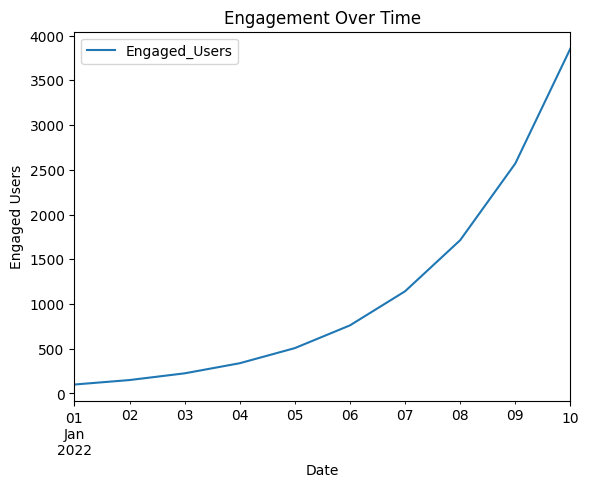

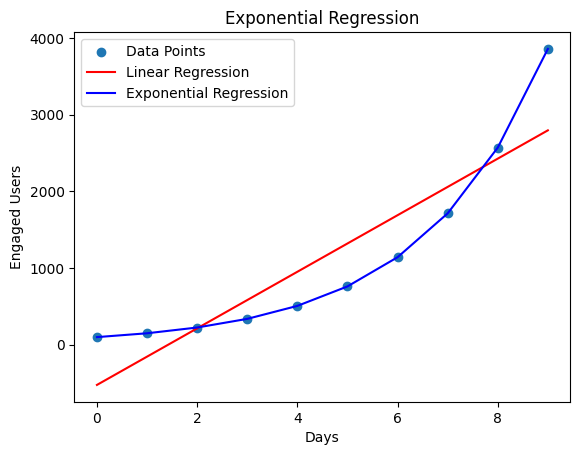

Linear Regression - MSE: 261371.25, R^2: 0.81
Exponential Regression - MSE: 0.38, R^2: 1.00


In [19]:
# Import libraries
#Already imported

# Sample dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100,150,225,338,507,761,1142,1713,2570,3855]
}

# Create a DataFrame from the dataset
df=pd.DataFrame(data)

# Convert Date to numerical format (days since the first date)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

# Extract the features (Days) and target (Engaged_Users)
X = df[['Days']]
Y = df[['Engaged_Users']]

# Visualize the data
df.plot(x='Date', y='Engaged_Users', kind='line')
plt.title('Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Engaged Users')
plt.show()

# Fit linear regression for comparison
lin_reg=LinearRegression()
lin_reg.fit(X, Y)
lin_pred=lin_reg.predict(X)

# Fit exponential regression | Esto porque estamos haciéndolo sobre el ln de la exponencial
Y_log = np.log(Y)
exp_reg = LinearRegression()
exp_reg.fit(X, Y_log)

# Predict log(Y) and then transform back to Y
exp_pred_log = exp_reg.predict(X)
exp_pred = np.exp(exp_pred_log)

# Plot results
plt.scatter(X, Y, label='Data Points')
plt.plot(X, lin_pred, color='red', label='Linear Regression')
plt.plot(X, exp_pred, color='blue', label='Exponential Regression')
plt.legend()
plt.title('Exponential Regression')
plt.xlabel('Days')
plt.ylabel('Engaged Users')
plt.show()

# Evaluate the models
from sklearn.metrics import mean_squared_error, r2_score
lin_mse=mean_squared_error(Y, lin_pred)
lin_r2=r2_score(Y, lin_pred)
exp_mse=mean_squared_error(Y, exp_pred)
exp_r2=r2_score(Y, exp_pred)

print(f'Linear Regression - MSE: {lin_mse:.2f}, R^2: {lin_r2:.2f}')
print(f'Exponential Regression - MSE: {exp_mse:.2f}, R^2: {exp_r2:.2f}')

In [22]:
#Ahora con SciPy
from scipy.optimize import curve_fit



# Power models

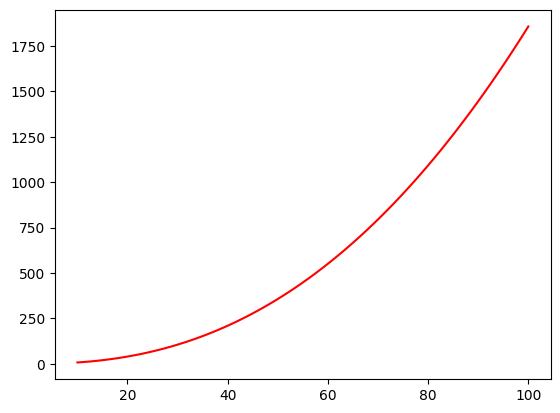

In [23]:
# Import libraries


# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25,50,100,200,350,550,800,1100,1450,1850],
    'Shares': [5,10,20,40,70,110,160,220,290,370],
    'Comments': [2,4,8,16,28,44,64,88,116,148]
}
df = pd.DataFrame(data)

# Perform power regression for Likes as an example
def power_function(x, a, b):
    return a * x**b

likes_params,_ = curve_fit(power_function, df['Followers'], df['Likes'])

# Extract the features (Followers) and target (Likes)
X = df[['Followers']]
Y = df[['Likes']]


# Generate a range of Followers values for the fitted curve
followers_range = np.linspace(df['Followers'].min(), df['Followers'].max(), 100)

# Calculate the predicted Likes using the fitted parameters
predicted_likes = power_function(followers_range, *likes_params)
# Create a plot to visualize the relationship

